<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
X.shape

(90, 83)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
Y=data["Class"].to_numpy()
type(Y)

numpy.ndarray

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()
X.iloc[:, 1:84] = transform.fit_transform(X.iloc[:, 1:84])

In [12]:
# transform = preprocessing.StandardScaler()
# X.iloc[:, 1:84] = preprocessing.StandardScaler().fit_transform(X.iloc[:, 1:84])

In [13]:
type(X)

pandas.core.frame.DataFrame

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [15]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
                    [
                     ('LR', LogisticRegression(max_iter=1000)) 
                    ]
                   )

parameters ={'LR__C':[0.01,0.1,1],
             'LR__penalty':['l2'],
             'LR__solver':['lbfgs']}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

logreg_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='accuracy',
    verbose=2
)

# Fit model
logreg_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END .......LR__C=0.01, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END ........LR__C=0.1, LR__penalty=l2, LR__solver=lbfgs; total time=   0.0s
[CV] END ........LR__C=0.1, LR__penalty=l2, LR__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('LR',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'LR__C': [0.01, 0.1, 1], 'LR__penalty': ['l2'],
                         'LR__solver': ['lbfgs']},
             scoring='accuracy', verbose=2)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
accuracy : 0.8214285714285714


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
test_score = logreg_cv.best_estimator_.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.833


In [19]:
test_score = logreg_cv.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.833


Lets look at the confusion matrix:


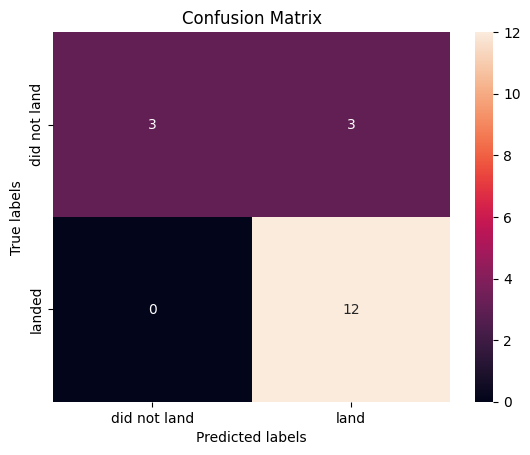

In [20]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
# parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()

In [22]:
pipeline = Pipeline(
                    [
                     ('svm', SVC()) 
                    ]
                   )

parameters = {'svm__kernel':('linear','poly','rbf', 'sigmoid'),
              'svm__C': np.logspace(-3, 3, 5),
              'svm__gamma':np.logspace(-3, 3, 5)}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svm_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='accuracy',
    verbose=2
)

# Fit model
svm_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .svm__C=0.001, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; total time=   0.0s
[CV] END ...svm__C=0.001, svm__gamma=0.001, 

[CV] END ..svm__C=0.001, svm__gamma=1.0, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.001, svm__gamma=31.622776601683793, svm__kernel=linear; total ti

[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.001, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0

[CV] END svm__C=0.03162277660168379, svm__gamma=1.0, svm__kernel=sigmoid; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.622776601683793, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=0.03162277660168379, svm__gamma=31.

[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END ...svm__C=1.0, svm__gamma=0.001, svm__kernel=linear; total time=   0.0s
[CV] END .....svm__C=1.0, svm__gamma=0.001, svm__kernel=poly; total time=   0.0s
[CV] END .....svm__C=1.0, svm__gamma=0.001, svm__kernel=poly; total time=   0.0s
[CV] END .....svm__C=1.0, svm__gamma=0.001, svm__kernel=poly; total time=   0.0s
[CV] END .....svm__C=1.0, svm__gamma=0.001, svm__kernel=poly; total time=   0.0s
[CV] END .....svm__C=1.0, sv

[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1.0, sv

[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=0.0316

[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=31.622776601683793, svm__gamma=31.622776601683793, svm__k

[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=linear; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=0.03162277660168379

[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=poly; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0s
[CV] END svm__C=1000.0, svm__gamma=31.622776601683793, svm__kernel=rbf; total time=   0.0

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('svm', SVC())]),
             param_grid={'svm__C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'svm__gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'svm__kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy', verbose=2)

In [23]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'svm__C': 0.03162277660168379, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
accuracy : 0.8089285714285713


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
test_score = svm_cv.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.833


In [25]:
test_score = svm_cv.best_estimator_.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.833


We can plot the confusion matrix


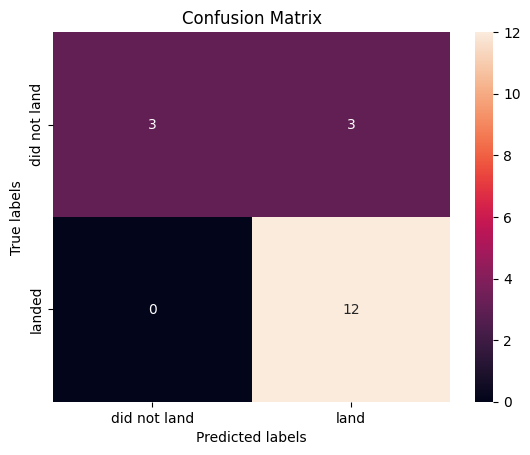

In [26]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
# parameters = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random'],
#      'max_depth': [2*n for n in range(1,10)],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}

# tree = DecisionTreeClassifier()

In [28]:
pipeline = Pipeline(
                    [
                     ('tree', DecisionTreeClassifier()) 
                    ]
                   )

parameters = {'tree__criterion': ['gini', 'entropy'],
     'tree__splitter': ['best', 'random'],
     'tree__max_depth': [2*n for n in range(1,10)],
     'tree__max_features': ['sqrt', 'log2', None],
     'tree__min_samples_leaf': [1, 2, 4],
     'tree__min_samples_split': [2, 5, 10]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tree_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='accuracy',
    verbose=2
)

# Fit model
tree_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_le

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; t

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total t

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best;

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; tot

[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total tim

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total t

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total tim

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; tot

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; to

[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random;

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best;

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; to

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; t

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; t

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random;

[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; tot

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best;

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitt

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__spli

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=b

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=be

[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=rando

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best;

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__spli

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=bes

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=be

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__spli

[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=rando

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=bes

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__spli

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=r

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=ran

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=rando

[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=gini, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitt

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=2, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tr

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__spli

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitt

[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=4, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitt

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=6, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, 

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree_

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2,

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__split

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, 

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=8, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_sp

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tr

[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=10, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=5

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tr

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=2

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_spli

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_sp

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split

[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=12, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=5

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10,

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=10, t

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=14, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_spli

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=log2, tree__min_samples_leaf=2, tree__min_samples_sp

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=2, tree

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=5, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=16, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=2, tree__min_samples_split=2,

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=sqrt, tree__min_samples_leaf=4, tree__min_samples_split=5, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=1, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=log2, tree__min_samples_leaf=4, tree__min_samples_split=2, tree__sp

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=1, tree__min_samples_split=5, tree__

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tree__splitter=best; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=2, tree__min_samples_split=10, tr

[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s
[CV] END tree__criterion=entropy, tree__max_depth=18, tree__max_features=None, tree__min_samples_leaf=4, tree__min_samples_split=10, tree__splitter=random; total time=   0.0s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tree', DecisionTreeClassifier())]),
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'tree__max_features': ['sqrt', 'log2', None],
                         'tree__min_samples_leaf': [1, 2, 4],
                         'tree__min_samples_split': [2, 5, 10],
                         'tree__splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'tree__criterion': 'gini', 'tree__max_depth': 4, 'tree__max_features': 'sqrt', 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10, 'tree__splitter': 'best'}
accuracy : 0.8785714285714287


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
test_score = tree_cv.best_estimator_.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.889


In [31]:
test_score = tree_cv.score(X_test, Y_test)
print(f"{test_score:.3f}")

0.889


We can plot the confusion matrix


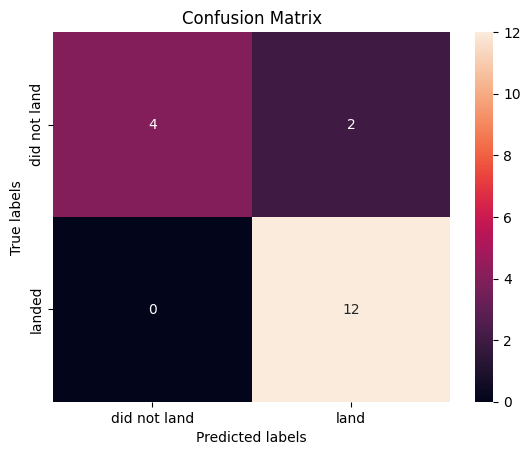

In [32]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [33]:
# parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'p': [1,2]}

# KNN = KNeighborsClassifier()

In [34]:
pipeline = Pipeline(
                    [
                     ('knn', KNeighborsClassifier()) 
                    ]
                   )

parameters = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__p': [1,2]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

knn_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=cv,
    scoring='accuracy',
    verbose=2
)

# Fit model
knn_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.2s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=1, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbo

[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=1; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=6, knn__p=2; total time=   0.0s
[CV] END ..knn__algorithm=au

[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=2, knn__p=2; total time=

[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=7, knn__p=2; total time=

[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=3, knn__p=2; total time=   0.0s
[CV] END knn__al

[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=2; total time=   0.0s
[CV] END knn__al

[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=4, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=bru

[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=1; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END .knn__algorithm=brute, knn__n_neighbors=9, knn__p=2; total time=   0.0s
[CV] END knn__algorithm=brut

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'knn__p': [1, 2]},
             scoring='accuracy', verbose=2)

In [35]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 1}
accuracy : 0.8071428571428572


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [36]:
test_score =knn_cv.score(X_test,Y_test)
print(f"{test_score:.3f}")

0.778


We can plot the confusion matrix


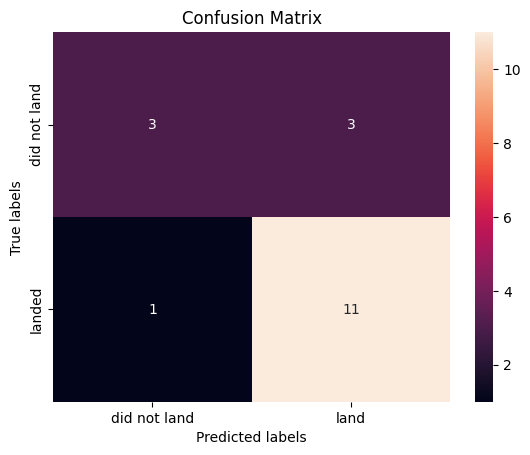

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [38]:
# support vector machine = logistic regression

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
